# Project 2: Netflix Data Analysis

In this project we will be working with a dataset of Netflix titles. We will be using its data to answer some questions about Netflix titles, directors, and countries using Pandas. We will also use Matplotlib to do a couple of interesting visualizations to get more interesting insights. The data is stored in a csv file named `netflix_titles.csv`.

Data extracted from: https://www.kaggle.com/datasets/shivamb/netflix-shows (with some cleaning and modifications).


### Project Tasks:

- `2.1.` Load the data using Pandas read_csv, use `show_id` as the index_col parameter.

- `2.2.` What is the min and max release years?  

- `2.3.` How many director names are missing values (NaN)?  

- `2.4.` How many different countries are there in the data?  

- `2.5.` How many characters long are on average the title names? (create a new column with the titles length if needed)  

- `2.6.` For a given year, make a pie chart of the number of movies and series combined made by every country, limit it to the top 10 countries.

- `2.7.` Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. (hint: you can create a new column with the integer value of the minutes and then use groupby year and then average on that minutes column)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:

data_path = "/Users/victormorenorequena/Downloads/EAE/Programming/eae_ipld_project/data/netflix_titles.csv"

movies_df = pd.read_csv(data_path, index_col='show_id')

print(movies_df)


            type                  title         director  \
show_id                                                    
s1         Movie   Dick Johnson Is Dead  Kirsten Johnson   
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   
...          ...                    ...              ...   
s8803      Movie                 Zodiac    David Fincher   
s8804    TV Show            Zombie Dumb              NaN   
s8805      Movie             Zombieland  Ruben Fleischer   
s8806      Movie                   Zoom     Peter Hewitt   
s8807      Movie                 Zubaan      Mozez Singh   

                                                      cast        country  \
show_id                                                                     
s1                                                     NaN  Unite

In [11]:
# Ex 2.2: What is the min and max release years?

min_release_year = movies_df['release_year'].min()
max_release_year = movies_df['release_year'].max()

print("Minimum Release Year:", min_release_year)
print("Maximum Release Year:", max_release_year)


Minimum Release Year: 1925
Maximum Release Year: 2021


In [12]:
# Ex 2.3: How many director names are missing values (NaN)?

num_missing_directors = movies_df['director'].isna().sum()

print(f"Number of missing directors: {num_missing_directors}")


Number of missing directors: 2634


In [13]:
# Ex 2.4: How many different countries are there in the data?

# Assuming 'country' column contains strings with comma-separated countries
all_countries = [country.strip() for countries in movies_df['country'].dropna() for country in countries.split(',')]
unique_countries = set(all_countries)
n_countries = len(unique_countries)

print(f"Number of different countries: {n_countries}")







Number of different countries: 123


In [14]:
# Ex 2.5: How many characters long are on average the title names?

movies_df['title_length'] = movies_df['title'].apply(lambda x: len(x))

avg_title_length = movies_df['title_length'].mean()

print(f"The average title length is {avg_title_length} characters")

The average title length is 17.725786306347224 characters


country
United States                                   25
India                                           20
Turkey                                           3
Japan                                            2
Taiwan                                           2
United States, Germany                           2
United States, United Kingdom                    2
United States, Canada                            1
Indonesia                                        1
United States, France, United Kingdom, Japan     1
Name: count, dtype: int64


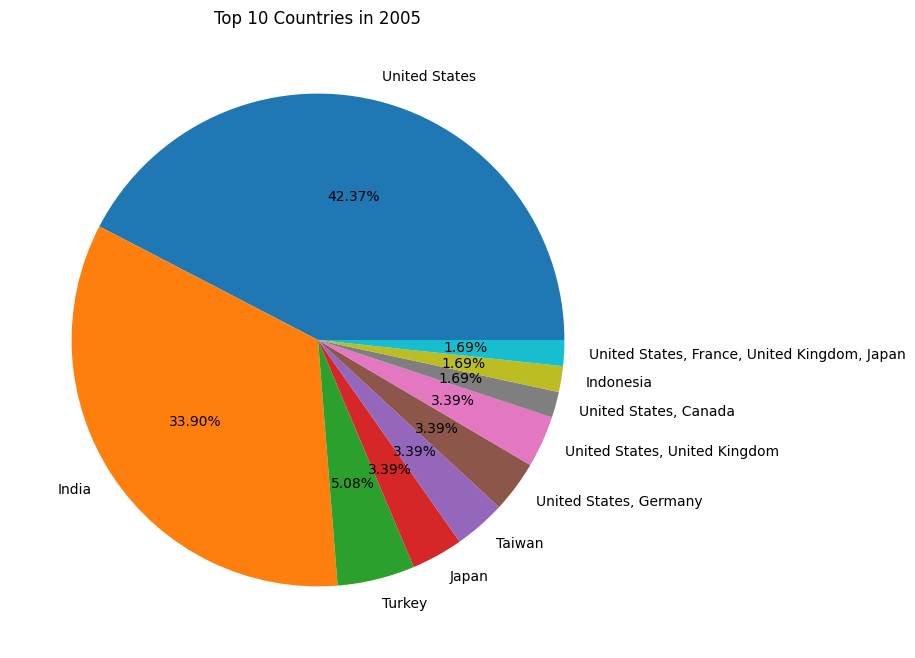

In [15]:
# Ex 2.6: For a given year, get the Pandas Series of how many movies and series combined were made by every country, limit it to the top 10 countries.

year = 2005

data_for_year = movies_df.loc[movies_df['release_year'] == year]

combined_ = data_for_year['country'].value_counts()

top_10_countries = combined_.head(10)

print(top_10_countries)

fig = plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct="%.2f%%")
plt.title(f"Top 10 Countries in {year}")

plt.show()

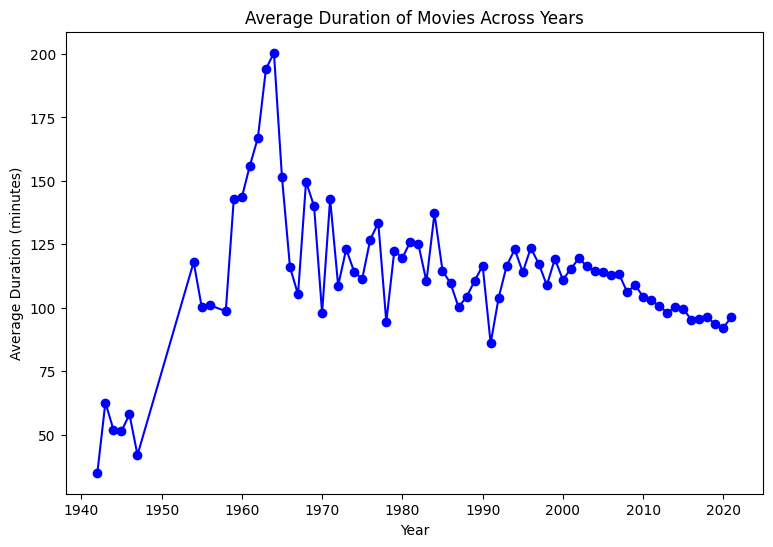

In [16]:
# Ex 2.7: Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. 

movies_df['duration_minutes'] = movies_df.loc[movies_df['type'] == 'Movie', 'duration'].apply(lambda x: int(x.split(' ')[0]) if pd.notnull(x) else None)

movies_avg_d = movies_df.loc[movies_df['type'] == 'Movie'].groupby('release_year')['duration_minutes'].mean()

fig = plt.figure(figsize=(9, 6))
plt.plot(movies_avg_d.index, movies_avg_d.values, marker='o', linestyle='-', color='b')

plt.title("Average Duration of Movies Across Years")
plt.xlabel("Year")
plt.ylabel("Average Duration (minutes)")

plt.show()